<font size=3>__Option 3: Maintenance cost reduction through predictive techniques__ </font>

<font size=2>__BACKGROUND__ </font><br>
A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive
maintenance solution to proactively identify when maintenance should be performed. This approach promises cost
savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.
<font size=2>__GOAL__ </font><br>
You are tasked with building a predictive model using machine learning to predict the probability of a device failure.
When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict
is called failure with binary value 0 for non-failure and 1 for failure.


Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=999

path = 'C:/Users/rithesh/Desktop/AWS/'
g_df=pd.read_csv(path+'predictive_maintenance.csv')

In [2]:
g_df.head()

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [3]:
print(g_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
id         124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB
None


In [4]:
print("Loaded:", g_df.shape[1],"columns and",g_df.shape[0],"rows of data")

Loaded: 12 columns and 124494 rows of data


In [5]:
g_df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [6]:
#No missing data
missing_data = pd.DataFrame({'total_missing': g_df.isnull().sum(), 'perc_missing': (g_df.isnull().mean())})
missing_data

,perc_missing,total_missing
date,0.0,0
id,0.0,0
failure,0.0,0
metric1,0.0,0
metric2,0.0,0
metric3,0.0,0
metric4,0.0,0
metric5,0.0,0
metric6,0.0,0
metric7,0.0,0


In [7]:
#Total no of unique machines
g_df.id.nunique()

1169

In [8]:
g_df.failure.value_counts()
# 1 - failure 
# 0 - non failure

0    124388
1       106
Name: failure, dtype: int64

In [8]:
g_df.id.value_counts()[:100]

Z1F0GE1M    304
Z1F0KJDS    304
S1F0GPXY    304
S1F0GCED    304
S1F0FP0C    304
S1F0E9EP    304
Z1F0MA1S    304
S1F0FGBQ    304
S1F0GGPP    304
S1F0H6JG    304
Z1F0QL3N    304
Z1F0QK05    304
S1F0EGMT    304
Z1F0GB8A    304
W1F0FEH7    304
W1F0SJJ2    304
Z1F0KKN4    304
W1F0JY02    304
Z1F0QLC1    304
W1F0FZPA    304
W1F0FY92    304
W1F0G9T7    304
Z1F0Q8RT    304
W1F0JH87    304
W1F0JXDL    304
W1F05X69    304
S1F0KYCR    304
W1F0T0B1    299
W1F1354W    295
Z1F18YB3    295
           ... 
W1F18TKX    292
S1F135GA    292
S1F130JB    292
W1F16RA7    292
W1F17D9Z    292
S1F136A5    292
W1F1DABR    292
Z1F1B6NP    292
S1F10PED    292
W1F15P5S    292
W1F111N7    292
Z1F0ZCPW    292
W1F1CLBY    292
S1F12788    292
S1F0Y6BM    292
Z1F1VMZB    292
W1F1D99S    292
S1F0YX6Z    292
S1F0Y8MA    292
S1F11S5B    292
S1F13JW4    292
S1F13619    292
S1F0X4RC    292
S1F10QL8    292
W1F1CKJZ    292
S1F122HQ    292
W1F0L66L    292
W1F10Y8K    292
W1F0ZK0H    292
S1F121LH    292
Name: id, Length: 100, d

In [17]:
failure_rate = g_df.failure.value_counts()[1]/(g_df.failure.value_counts()[1]+g_df.failure.value_counts()[0]) *100
print("Failure rate in %:", failure_rate)

Failure rate in %: 0.0851446656064


In [15]:
g_df['id'].describe()

count       124494
unique        1169
top       S1F0GCED
freq           304
Name: id, dtype: object

In [21]:
g_df["date_dt"] = pd.to_datetime(g_df["date"])
g_df['date_ym']=g_df['date_dt'].map(lambda x: x.strftime('%Y-%m'))
t1=g_df[['date_ym']]
for column in t1.columns:
    print("----------------------------------------------------------------")
    print(column+":")
    print("Unique Column values:")
    print("----------------------------------------------------------------")
    print(g_df[column].unique())
    print("----------------------------------------------------------------")
    print("Count of unique column values:")
    print(g_df[column].nunique())
    print("----------------------------------------------------------------")
    print("Counts:")
    print(g_df[column].value_counts())


----------------------------------------------------------------
date_ym:
Unique Column values:
----------------------------------------------------------------
['2015-01' '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07'
 '2015-08' '2015-09' '2015-10' '2015-11']
----------------------------------------------------------------
Count of unique column values:
11
----------------------------------------------------------------
Counts:
2015-01    25032
2015-03    19833
2015-02    19500
2015-04    12012
2015-05    11330
2015-07    10531
2015-06    10469
2015-08     8346
2015-09     4470
2015-10     2940
2015-11       31
Name: date_ym, dtype: int64


In [17]:
g_df['date_dt'].describe()

count                  124494
unique                    304
top       2015-01-03 00:00:00
freq                     1163
first     2015-01-01 00:00:00
last      2015-11-02 00:00:00
Name: TimeReviewed, dtype: object

In [34]:
g_df['date_dt'].value_counts()

2015-01-03    1163
2015-01-01    1163
2015-01-02    1163
2015-01-04    1162
2015-01-05    1161
2015-01-06    1054
2015-01-07     798
2015-01-08     756
2015-01-09     756
2015-01-12     755
2015-01-13     755
2015-01-11     755
2015-01-10     755
2015-01-14     716
2015-01-17     715
2015-01-16     715
2015-01-29     715
2015-01-15     715
2015-01-18     714
2015-01-20     713
2015-01-19     713
2015-01-22     712
2015-01-28     712
2015-02-10     712
2015-02-05     712
2015-02-03     712
2015-01-21     712
2015-01-24     712
2015-01-31     712
2015-02-07     712
              ... 
2015-09-04     146
2015-09-08     146
2015-10-04     146
2015-10-09     141
2015-10-06     141
2015-10-07     141
2015-10-08     141
2015-10-10     140
2015-10-12     140
2015-10-11     140
2015-09-03     115
2015-10-14     111
2015-10-13     111
2015-10-18     109
2015-10-19     109
2015-10-16     109
2015-10-17     109
2015-10-15     109
2015-10-22      69
2015-10-20      69
2015-10-21      69
2015-10-26  

Text(0.5,1,'Frequency distribution of date_ym')

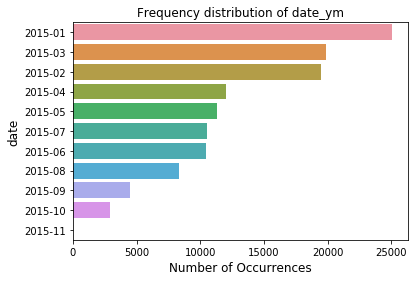

In [28]:
import seaborn as sns
d=g_df['date_ym'].value_counts()[:20]
sns.barplot(x= d.values, y = d.index)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('date', fontsize=12)
plt.title('Frequency distribution of date_ym',fontsize=12)


In [32]:
g_df.head()

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,date_ym,date_dt
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015-01,2015-01-01
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015-01,2015-01-01
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015-01,2015-01-01
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015-01,2015-01-01
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015-01,2015-01-01


In [33]:
g_df.dtypes

date               object
id                 object
failure             int64
metric1             int64
metric2             int64
metric3             int64
metric4             int64
metric5             int64
metric6             int64
metric7             int64
metric8             int64
metric9             int64
date_ym            object
date_dt    datetime64[ns]
dtype: object

In [35]:
#Total no of failures by month
g_df.groupby('date_ym').agg({'failure':'sum'})

,failure
date_ym,
2015-01,24
2015-02,14
2015-03,9
2015-04,9
2015-05,21
2015-06,6
2015-07,16
2015-08,4
2015-09,0


In [147]:
#fail= g_df[['TimeReviewed','id']].loc[g_df['failure']==1].sort_values(by = ['TimeReviewed'],ascending = True)[:110]
#passed = g_df[['date_dt','id']].loc[g_df['failure']==0].sort_values(by = ['TimeReviewed'],ascending = True)

#passed.head()

,TimeReviewed,id
0,2015-01-01,0
779,2015-01-01,784
778,2015-01-01,783
777,2015-01-01,782
776,2015-01-01,781


In [177]:
#result = pd.merge(passed,fail,
                 on='id', 
                 how='inner')
#result['date_diff'] = (result['TimeReviewed_y'] - result['TimeReviewed_x']).dt.days
#result['working_days'] = result['date_diff'].loc[result['date_diff']>=0]
#result['recover_days'] = (result['date_diff'].loc[result['date_diff']<0]) *-1
#result

,TimeReviewed_x,id,TimeReviewed_y,date_diff,working_days,recover_days
0,2015-01-01,797,2015-03-24,82,82.0,NaN
1,2015-01-02,797,2015-03-24,81,81.0,NaN
2,2015-01-03,797,2015-03-24,80,80.0,NaN
3,2015-01-04,797,2015-03-24,79,79.0,NaN
4,2015-01-05,797,2015-03-24,78,78.0,NaN
5,2015-01-06,797,2015-03-24,77,77.0,NaN
6,2015-01-07,797,2015-03-24,76,76.0,NaN
7,2015-01-08,797,2015-03-24,75,75.0,NaN
8,2015-01-09,797,2015-03-24,74,74.0,NaN
9,2015-01-10,797,2015-03-24,73,73.0,NaN


In [178]:
result.describe()

,id,date_diff,working_days,recover_days
count,10607.000000,10607.000000,10560.000000,47.000000
mean,584.293863,80.231262,80.640436,11.702128
std,371.558776,60.186919,60.003777,8.944065
min,8.000000,-30.000000,1.000000,1.000000
25%,147.000000,29.000000,30.000000,4.000000
50%,628.000000,70.000000,70.000000,10.000000
75%,886.000000,120.000000,120.000000,18.500000
max,1165.000000,298.000000,298.000000,30.000000


In [36]:
#Confirming that there were 0 failures on the first day
g_df.loc[(g_df['failure']==1) & (g_df['date']=='2015-01-01')].sort_values(by = ['date_dt'],ascending = True)

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,date_ym,date_dt


In [158]:
#result.loc[result['date_diff']<=0]

,TimeReviewed_x,id,TimeReviewed_y,date_diff
856,2015-07-19,819,2015-07-18,-1
857,2015-07-20,819,2015-07-18,-2
858,2015-07-21,819,2015-07-18,-3
859,2015-07-22,819,2015-07-18,-4
860,2015-07-23,819,2015-07-18,-5
861,2015-07-24,819,2015-07-18,-6
862,2015-07-25,819,2015-07-18,-7
863,2015-07-26,819,2015-07-18,-8
864,2015-07-27,819,2015-07-18,-9
865,2015-07-28,819,2015-07-18,-10


In [38]:
#Looks like every machine at the max failed once 
g_df.groupby('id').agg({'failure':'sum'}).sort_values(by = ['failure'],ascending = False)[:100]

,failure
id,
Z1F0LSNZ,1
W1F1230J,1
Z1F0P5D9,1
S1F0L0DW,1
W1F1DQN8,1
S1F0JGJV,1
S1F0JD7P,1
S1F0J5JH,1
Z1F0QH0C,1


In [39]:
g_df.columns

Index(['date', 'id', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'date_ym',
       'date_dt'],
      dtype='object')

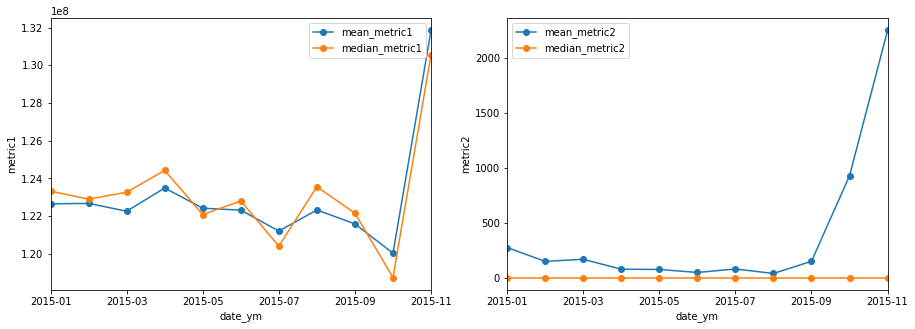

In [40]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric11']=g_df['metric1']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric1': 'mean','metric11': 'median'}).rename(columns = {'metric1':'mean_metric1', 'metric11': 'median_metric1'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric1', 'median_metric1'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric1")

g_df['metric22']=g_df['metric2']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric2': 'mean','metric22': 'median'}).rename(columns = {'metric2':'mean_metric2', 'metric22': 'median_metric2'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric2', 'median_metric2'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric2")

plt.show()

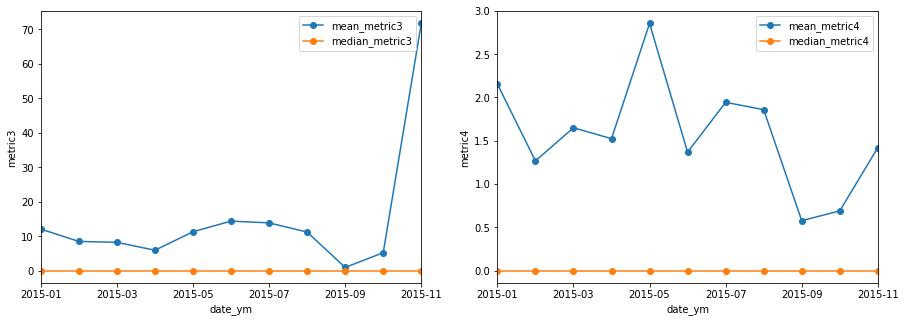

In [41]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric33']=g_df['metric3']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric3': 'mean','metric33': 'median'}).rename(columns = {'metric3':'mean_metric3', 'metric33': 'median_metric3'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric3', 'median_metric3'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric3")

g_df['metric44']=g_df['metric4']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric4': 'mean','metric44': 'median'}).rename(columns = {'metric4':'mean_metric4', 'metric44': 'median_metric4'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric4', 'median_metric4'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric4")

plt.show()


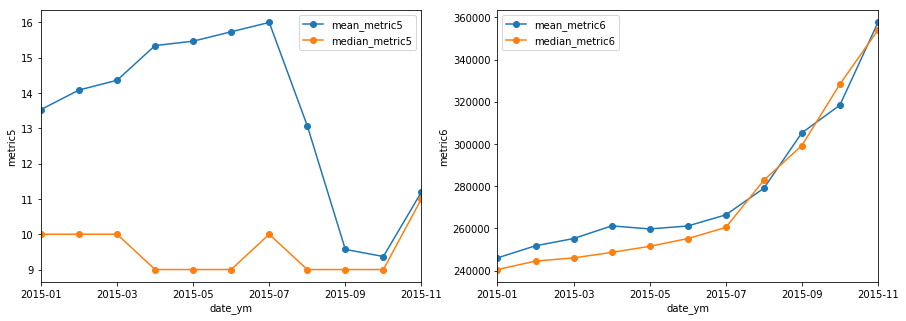

In [42]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric55']=g_df['metric5']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric5': 'mean','metric55': 'median'}).rename(columns = {'metric5':'mean_metric5', 'metric55': 'median_metric5'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric5', 'median_metric5'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric5")

g_df['metric66']=g_df['metric6']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric6': 'mean','metric66': 'median'}).rename(columns = {'metric6':'mean_metric6', 'metric66': 'median_metric6'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric6', 'median_metric6'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric6")

plt.show()


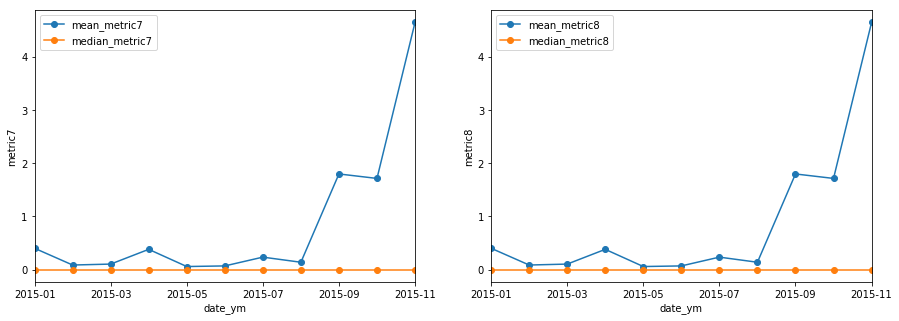

In [43]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric77']=g_df['metric7']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric7': 'mean','metric77': 'median'}).rename(columns = {'metric7':'mean_metric7', 'metric77': 'median_metric7'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric7', 'median_metric7'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric7")

g_df['metric88']=g_df['metric8']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric8': 'mean','metric88': 'median'}).rename(columns = {'metric8':'mean_metric8', 'metric88': 'median_metric8'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric8', 'median_metric8'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric8")

plt.show()


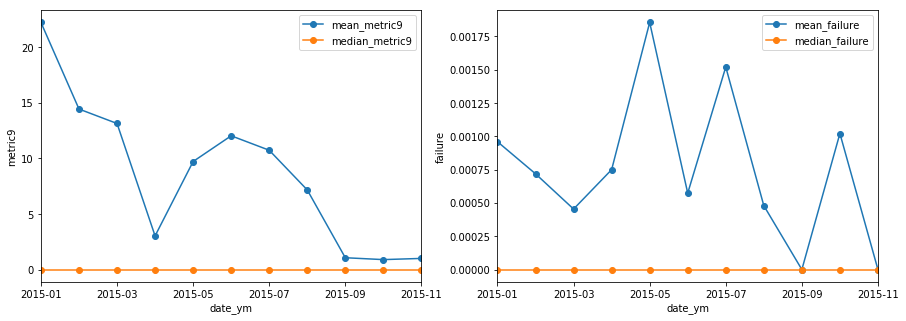

In [44]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric99']=g_df['metric9']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric9': 'mean','metric99': 'median'}).rename(columns = {'metric9':'mean_metric9', 'metric99': 'median_metric9'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric9', 'median_metric9'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric9")

g_df['failure1']=g_df['failure']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'failure': 'mean','failure1': 'median'}).rename(columns = {'failure':'mean_failure', 'failure1': 'median_failure'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_failure', 'median_failure'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("failure")

plt.show()


In [45]:
#Check to see if both these variables metric7 and metric8 are exactly the same; if so, drop one of them
g_df['metric7'].equals(g_df['metric8'])

True

In [46]:
#dropping columns
drop_col=['metric8','metric11','metric22','metric33','metric44','metric55','metric66','metric77','metric88','metric99','failure1']
g_df=g_df.drop(drop_col,axis=1)

In [30]:
#g_df['date_day'] = g_df['date_dt'].dt.day

In [47]:
t3=g_df.loc[g_df['failure'] ==1]
t3

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,date_ym,date_dt
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,1,2015-01,2015-01-05
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,3,2015-01,2015-01-07
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,0,2015-01,2015-01-09
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,1,2015-01,2015-01-13
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,2015-01,2015-01-14
14734,2015-01-17,W1F0T034,1,154998752,1312,0,18,10,306996,0,0,2015-01,2015-01-17
15087,2015-01-18,S1F0GG8X,1,54292264,64736,0,160,11,192179,0,2,2015-01,2015-01-18
15773,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,3,2015-01,2015-01-19
15859,2015-01-19,S1F0QY11,1,159635352,0,0,9,7,231336,16,0,2015-01,2015-01-19
15898,2015-01-19,S1F0S2WJ,1,238299872,1184,0,0,14,268662,8,0,2015-01,2015-01-19


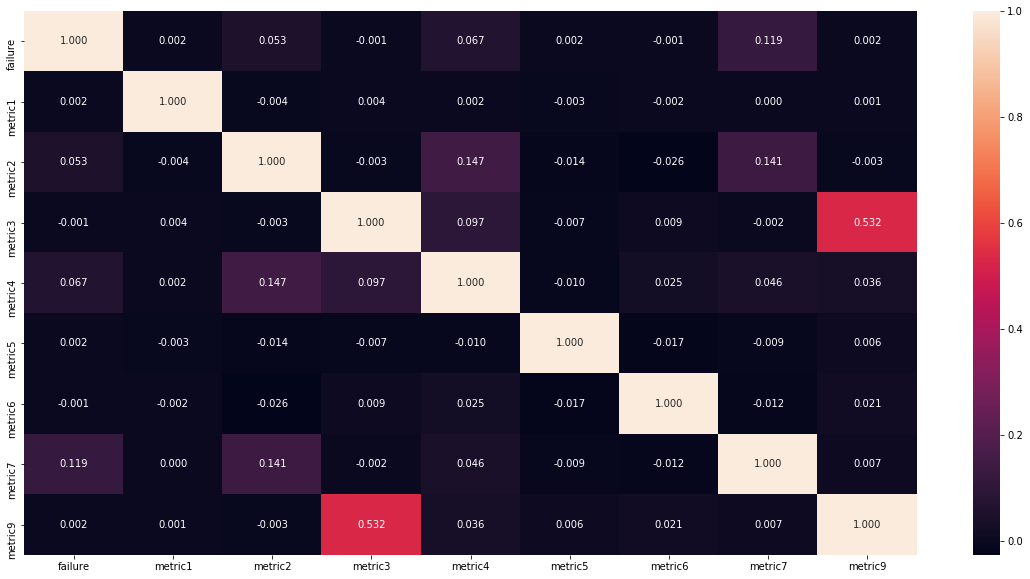

In [48]:
#Understanding feature correlation 
import seaborn as sns
drop_columns=['date','date_ym']
data_df = g_df.drop(drop_columns, axis=1)
plt.figure(figsize=(20,10))
data_corr = data_df.corr()
sns.heatmap(data_corr,annot=True,fmt='0.3f')
plt.show()

In [50]:
#importing packages
import sklearn
import os
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

In [51]:
#Lable encoding categorical column
category_columns = ['id']
for col in category_columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(g_df[col].values.astype('str')))
    g_df[col] = lbl.transform(list(g_df[col].values.astype('str')))

In [52]:
#Creating train and test (validation) data sets with a 80-20 split
from sklearn.model_selection import train_test_split
data_df=g_df
drop_columns=['failure','date_dt','date_ym','date']
X = data_df.drop(drop_columns, axis=1)
Y = data_df['failure']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (99595, 9)
Shape of y_train (99595,)
Shape of x_valid (24899, 9)
Shape of y_valid (24899,)


In [55]:
#3 fold cross validator
kfold = StratifiedKFold(n_splits=3)
random_state = 10

Building Baseline models

      Algorithm  CrossValMeans  CrossValerrors
0  DecisionTree       0.517140        0.014112
1  RandomForest       0.637634        0.014092
2           GBM       0.782653        0.036933
3      Logistic       0.481020        0.035920
4      LightGBM       0.737989        0.044459


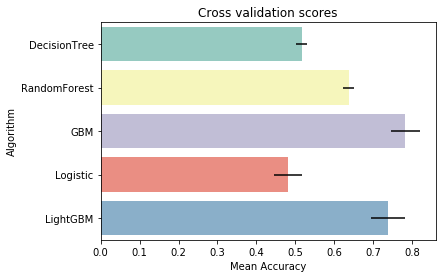

In [56]:
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(lgb.LGBMRegressor(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree",
"RandomForest","GBM","Logistic","LightGBM"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_res)

In [70]:
#Tuning LightGBM model with various paramaters ranges
#n_estimators ranges between 50 to 300 in increments of 50
#learning_rate - 0.01,0.001,0.05,0.25,0.05,0.1
#max_depth - 2,3,4
model = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=50, learning_rate=0.05, sub_sample=0.75, max_depth=3)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [71]:
#Though accuracy and roc_auc looks fine, f1 score is 0; dataset is very imbalanced
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("F1 Score:", f1_score)
print("Accuracy Score:", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")

Light GBM Classification Model Performance Metrics:
-------------------------------
F1 Score: 0.0
Accuracy Score: 0.99919675489
roc_auc: 0.826315366373
gini: 0.652630732746
-------------------------------


C:\Users\rithesh\Anaconda3\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [72]:
# Tuning Gradient Boosting  with various learning rates
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features='sqrt', max_depth = 3, random_state = 0,subsample=0.8)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.999
Accuracy score (validation): 0.999

Learning rate:  0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.999

Learning rate:  0.25
Accuracy score (training): 0.936
Accuracy score (validation): 0.935

Learning rate:  0.5
Accuracy score (training): 0.988
Accuracy score (validation): 0.988

Learning rate:  0.75
Accuracy score (training): 0.103
Accuracy score (validation): 0.099

Learning rate:  1
Accuracy score (training): 0.043
Accuracy score (validation): 0.044



In [74]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.25, max_features='sqrt',
                                min_samples_split=400,max_depth = 2, random_state = 0,subsample=0.8) #300,400
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))
CM=confusion_matrix(Y_test, predictions)
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])

Confusion Matrix:
[[24692   187]
 [   18     2]]

Classification Report
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     24879
          1       0.01      0.10      0.02        20

avg / total       1.00      0.99      1.00     24899

TN =  24692
FN = 18
TP = 2
FP = 187


From the above results, it is evident that failures are been identified by the model

In [75]:
predictions.sum()

189

In [76]:
Y_test.sum()

20

In [127]:
g_df.columns

Index(['date', 'id', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric9', 'TimeReviewed', 'date_ym',
       'date_day'],
      dtype='object')

In [136]:
#import datetime
#week = dt.datetime(2015,9,1).isocalendar()[1]
g_df['Week_no'] = g_df.TimeReviewed.apply(lambda x:x.isocalendar()[1]) -1
g_df['Day_of_week']  = g_df.TimeReviewed.apply(lambda x:x.isocalendar()[2])


In [137]:
g_df.tail(100)

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,TimeReviewed,date_ym,date_day,Week_no,Day_of_week,Day1
124394,2015-10-29,975,0,220362904,0,0,0,11,355950,0,0,2015-10-29,2015-10,29,43,4,29
124395,2015-10-29,976,0,183947136,0,0,0,9,350076,0,0,2015-10-29,2015-10,29,43,4,29
124396,2015-10-29,1045,0,31629984,0,0,0,10,352307,0,0,2015-10-29,2015-10,29,43,4,29
124397,2015-10-29,1068,0,44041760,72,107,4,11,331417,0,13,2015-10-29,2015-10,29,43,4,29
124398,2015-10-29,1075,0,134417624,4832,0,0,11,349066,0,0,2015-10-29,2015-10,29,43,4,29
124399,2015-10-29,1081,0,4984656,0,0,0,12,356903,0,0,2015-10-29,2015-10,29,43,4,29
124400,2015-10-29,1082,0,144154160,0,0,0,10,350092,0,0,2015-10-29,2015-10,29,43,4,29
124401,2015-10-30,79,0,114624520,0,0,12,11,352053,0,0,2015-10-30,2015-10,30,43,5,30
124402,2015-10-30,81,0,73017832,0,0,12,11,346827,32,0,2015-10-30,2015-10,30,43,5,30
124403,2015-10-30,85,0,129937624,0,0,0,12,307564,0,0,2015-10-30,2015-10,30,43,5,30


In [139]:
g_df.Day_of_week.unique()

array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

In [ ]:
#SMOTE, ROLLING WINDOWS (MEAN, MIN, MAX of every metric), #days between machine ran without failure

In [78]:
from imblearn.over_sampling import SMOTE
X_1 = data_df.drop(drop_columns, axis=1)
Y_1 = data_df['failure']
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_1, Y_1)
print(X.shape, Y.shape)
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
model = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features='sqrt', max_depth = 3, random_state = 0,subsample=0.8)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

In [ ]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 1, max_features='sqrt',
                                min_samples_split=400,max_depth = 6, random_state = 0,subsample=0.8) #300,400
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))
CM=confusion_matrix(Y_test, predictions)
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])

In [ ]:
new_data = g_df
days = [7, 14, 30, 60, 90]
numbers = [1, 2, 3, 4, 5, 6, 7, 9]
for day in days:
    for metric in numbers:
        new_data['metric' + str(metric) + '_' + str(day) + '_mean'] = g_df.groupby('id', sort=False)['metric' + str(metric)].transform(lambda x: x.rolling(day).mean())
        new_data['metric' + str(metric) + '_' + str(day) + '_min'] = g_df.groupby('id', sort=False)['metric' + str(metric)].transform(lambda x: x.rolling(day).min())
        new_data['metric' + str(metric) + '_' + str(day) + '_max'] = g_df.groupby('id', sort=False)['metric' + str(metric)].transform(lambda x: x.rolling(day).max())
print(new_data.head())

In [ ]:
from imblearn.over_sampling import SMOTE
new_data.fillna(0, inplace=True)
X_1 = new_data.drop(drop_columns, axis=1)
Y_1 = new_data['failure']
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_1, Y_1)
print(X.shape, Y.shape)
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

In [ ]:
model = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = np.array(train_predictions)
test_predictions = np.array(test_predictions)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(train_predictions.shape, Y_train.shape)
print(test_predictions.shape, Y_test.shape)

In [ ]:
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features='sqrt', max_depth = 3, random_state = 0,subsample=0.8)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

In [ ]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
GBC1 = GradientBoostingClassifier()
gb_param_grid = {
              'learning_rate': [0.01,0.1,0.5],
              'max_depth': [5,6],
              'subsample':[0.7,0.8],
              'n_estimators':[50,100],
              'max_features':['sqrt'],
              'random_state':[0],
               'min_samples_split':[300,400]
              }

gsGBC1 = GridSearchCV(GBC1,param_grid = gb_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)
gsGBC1.fit(X_train,Y_train)
GBC_best1 = gsGBC1.best_estimator_
# Best score
gsGBC1.grid_scores_, gsGBC1.best_params_, gsGBC1.best_score_

In [ ]:
predictions = gsGBC1.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))
CM=confusion_matrix(Y_test, predictions)
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])